## Using feedback to make a system not incontrol, in control.
Mathematically control is all about the poles.  If the real part of all the poles are on the left hand side of the complex plane (less than zero), then the system is in control. We can use a feedback network to move poles from the RHP to the left hand plane.

## Example 3 fixing a system out of control
$H(s)=\frac{10}{s^2-10s-100}$
We can see that the poles are at $5 \pm 5\sqrt{5}$, one of which is not on the left hand plane, so it it is out of control.   The positive pole will give an exponentially increases term that will dominate the systems step response.


To make a new system that takes the system described by H(s), make a system with an summer, a feedback transfer function, G(s), and the original H(s) function that the system has a block diagram that results in:
$$
Q(s)=\frac{H(s)}{1+G(s)\times  H(s)}
$$
Where $Q(s)$ is the transfer function of the complete system. The figure below is the block diagram of a simple control system that will create Q(s).


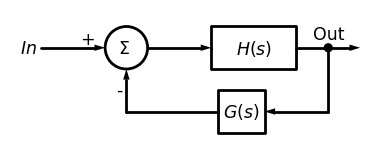

In [1]:
import schemdraw as schem
import schemdraw.elements as e
from schemdraw import dsp 
d = schem.Drawing()
a1=d.add(dsp.Arrow(l=d.unit/2).label('+', loc='right',ofst=(-.6, .2)).label('$In$', loc='left'))
sm = d.add(dsp.SumSigma())
a2=d.add(dsp.Arrow(l=d.unit/2))
delay1 = d.add(dsp.Box(w=2, h=1, label='$H(s)$', anchor='W'))
a3=d.add(dsp.Arrow('right', l=d.unit/2, xy=delay1.E,label='Out'))
#a4=d.add(dsp.Arrow(xy=sm.S, theta=-90,l=d.unit/2,reverse=True).label('-', loc='right',ofst=(.6, .2)))
d.add(dsp.Dot(xy=a3.center))
l1=d.add(dsp.Line('down', xy=a3.center, l=.5*d.unit))
l2=d.add(dsp.Arrow('left', l=.5*d.unit))
g2 = d.add(dsp.Box(w=1.1, h=1, label='$G(s)$', anchor='E'))
l3=d.add(dsp.Line('left', tox=sm.S, xy=g2.W))
l4=d.add(dsp.Arrow('up', toy=sm.S,label='-'))
d.draw()


Now that we have the block diagram for the new system, Q(s), we need to design G(s) to ensure all the poles are int he the LHP.  It can be help to break up H(s) into the numerator and denominator.
$$H(s)=\frac{N(s)}{D(s)}$$
In this example $N(s)=1$, and $D(s)=s^2-10s-100$.
Substitute N(s) and D(s) into Q(s)
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$

If we look at the above equation we see the numerator of Q(s) is the same as the numerator as H(s), and the original D(s) of H(s) is in Q(s)'s denominator.  What has changed is that the new denominator has a new term summed to the original D(s): G(s)N(s) now to make sure all the poles of Q(s) are int he LHP, we just have to choose a G(s) that makes roots of $D(s)+G(s)N(s)$ all on the LHP.

In this example: 
$$Q(s)=\frac{10}{s^2-10s-100+G(s)\times 10}$$
What $G(s)\times 10$ will turn the real part of the poles negative?
In this case we need two terms a proportional feedback term $K_1$ and a proportional feedback plus derivative term $K_2s $ derivative, so $G(s)=K_1+K_2s$.
The pole becomes:
The new Q(s) becomes:
$$Q(s)=\frac{1}{s+100+Ks\times 10}=\frac{1}{s+10(K_2-1)s-100+10K_1}$$  if $K_2>1$, and $K_1>10$ then the system will be in control.

**How did I determine we needed $G(s)=K_1+K_2s$?**

The quadratic equation can be too much to deal with and so there is a trick for second order systems.
According to Decartes rule a second order system the real part of the roots will be negative if every term of the polynomial is present $\left(s^2, s^1, s^0\right)$ and the scale factor for each term has the same sign. $\left(as^2+bs^1+cs^0\right)$. (a>0, b>0, and c>0) or (a<0, b<0, and c<0) **This only works for second order and below!  For third order or higher you have to use the [Rooth-Hurwitz condition](https://en.wikipedia.org/wiki/Routh%E2%80%93Hurwitz_stability_criterion).  EE110 only covers 2nd order and below control systems**
 
Looking at the denominator of Q(s):$s^2-10s-100+G(s)\times 10$ we see that the b term and the c term are negative.  We need $10G(s)$ to turn -10s positive and -100 positive.  In order to do that there needs to be two kinds of feedback $K_2s$ and $K_1$.  in this case $G(s)=K_2s+K_1$



## Exam Problems
Given the conditions there are a finite amount of problems that can be asked.  
N(s) of the out of control transfer system is limited to six choices: 
$$N(s)=\pm A, \pm As, \pm As^2$$  Where A is real number.
While it is true that N(s) could also equal $A+Bs$, $a+Bs^2$, and $As+Bs^2$, these are more tricky to deal will on an exam and so will not be used.

The choices for out of control D(s) polynomials are:
$$s^2-bs+c$$  
$$s^2+bs-c$$  
$$s^2-bs-c$$  
$$s^2+c$$
where all choices for N(s) are valid. This gives $6 \times 4=24$ choices. There are two more choices for D(s):
$$s^2-bs$$  
$$s^2+bs$$  
but only $N(s)=\pm A$ will keep th system second order.   This is an additional $2 \times 2=4$ choices.  Therefore there are only 26 possible exam problems of this type.

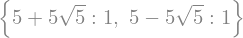

In [2]:
from lcapy import s, j, pi, f, transfer, j2pif,t,exp
from sympy import *
K1,K2= symbols("K1,K2", positive=True)
import numpy as np
from matplotlib.pyplot import savefig
H=transfer(10/(s**2-10*s-100)).simplify()
H.poles()


In [3]:
G=K1+K2*s
Q=H/(1+G*H).normal()
Q

                10               
─────────────────────────────────
                   2             
10⋅K₁ + 10⋅K₂⋅s + s  - 10⋅s - 100

In [4]:
Q=Q.subs(K2,2.121)
Q=Q.subs(K1,20)
Q

        10       
─────────────────
 2   1121⋅s      
s  + ────── + 100
      100        

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

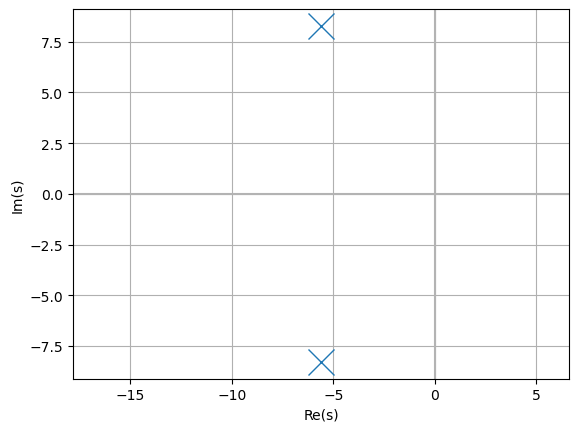

In [5]:
Q.plot()

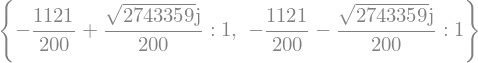

In [6]:
Q.poles()

We can see the repeated poles are now on the LHP.

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

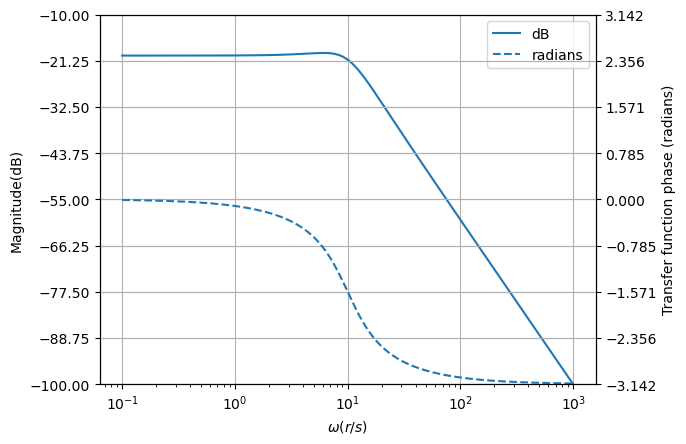

In [7]:
A = Q.subs(j * f)
fv = np.logspace(-1, 3, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

This looks like an underdamped low pass filter.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

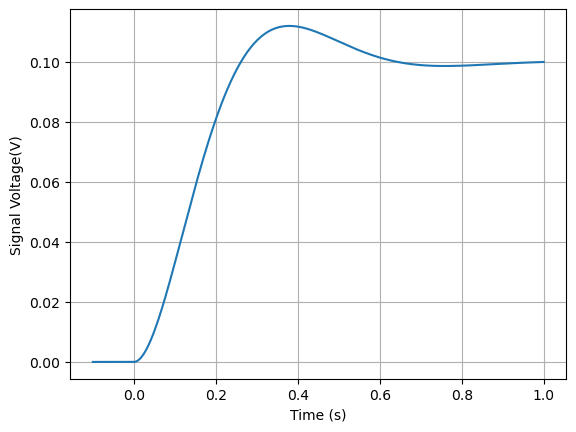

In [8]:
tv = np.linspace(-.1, 1, 400)
STEP=1/s 
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

The step response is settles to a constant value, therefore it is in control.

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

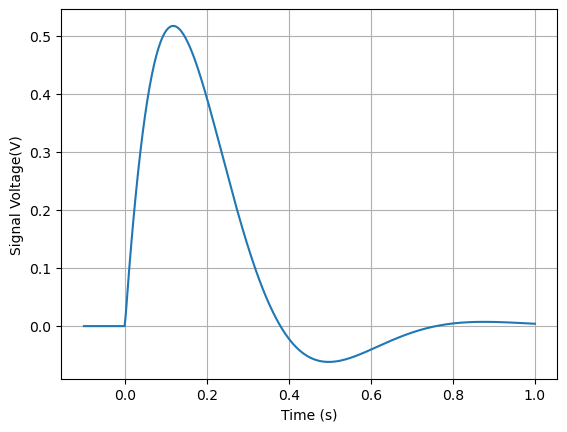

In [9]:
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')

The impulse response is settles to zero, therefore it is in control.

## Extra Example

$H(s)=\frac{-10s}{s^2-10s-100}$
$$Q(s)=\frac{H(s)}{1+G(s)H(s)}=\frac{N(s)}{D(s)}\times\frac{1}{1+G(s)\times\frac{N(s)}{D(s)}}=\frac{N(s)}{D(s)+G(s)\times N(s)}$$
$$Q(s)=\frac{-10s}{s-10s-100-G(s)\times 10s}$$
 
Assume $G(s)=K_1+\frac{K_2}{s}$.

$$Q(s)=\frac{s^2}{s-(1+K_1)10s-100+\frac{K_2}{s}\times s}=\frac{s^2}{s^2-(1+K_2)10s-(100+10K_2})$$

In this case the quadratic equation term associated with s is $b=-(1+K_1)10$ to make b positive, then $K_1<-1$. **In this case the K value has to be negative!**

The term associated with $s^0$ is $c=-(100+10K_2)$  In this case $K_2<-10$ **In this case the K value has to be negative!**


In [10]:
H=transfer(-10*s/(s**2-10*s-100)).simplify()
G=K1+K2/s
Q=H/(1+G*H).normal().simplify()
Q

               10⋅s              
─────────────────────────────────
                   2             
10⋅K₁⋅s + 10⋅K₂ - s  + 10⋅s + 100

In [11]:
Q=Q.subs(K1,-20)
Q=Q.subs(K2,-20)
Q


       10⋅s       
──────────────────
   2              
- s  - 190⋅s - 100

<Axes: xlabel='Re(s)', ylabel='Im(s)'>

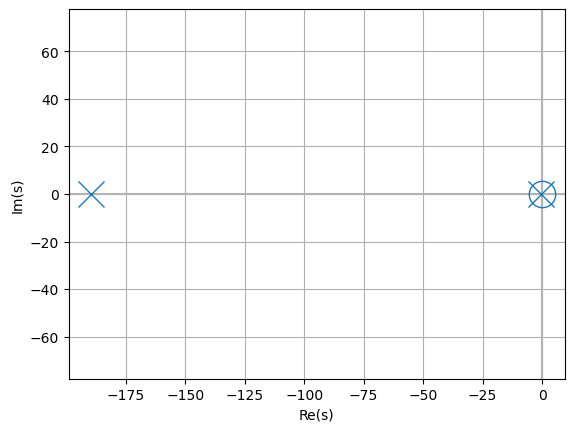

In [12]:
Q.plot()

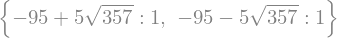

In [13]:
Q.poles()

(<Axes: xlabel='$\\omega (r/s)$', ylabel='Magnitude(dB)'>,
 <Axes: xlabel='$\\omega (r/s)$', ylabel='Transfer function phase (radians)'>)

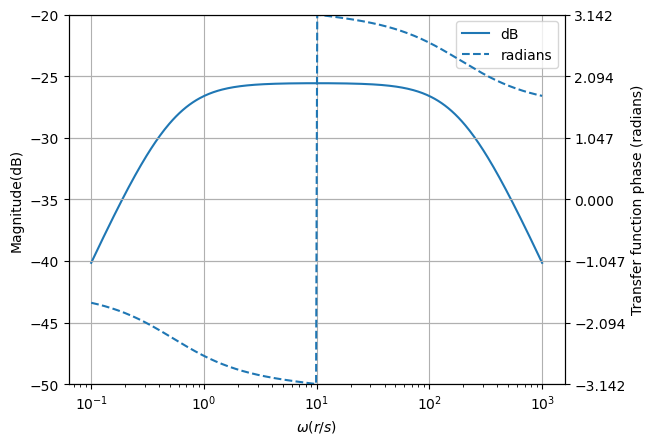

In [17]:

A = Q.subs(j * f)
fv = np.logspace(-1, 3, 400)
A.plot(fv, log_frequency=True,ylabel="Magnitude(dB)",xlabel='$\omega (r/s)$')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

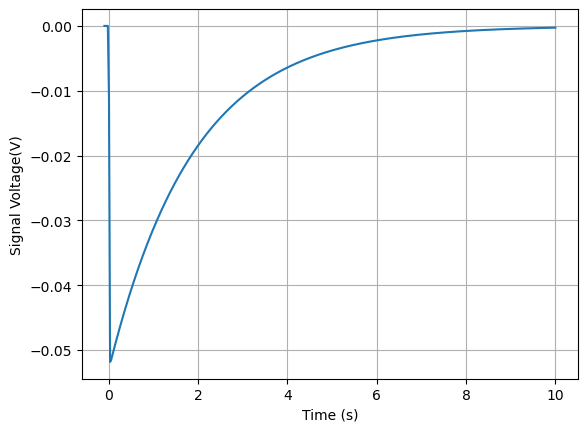

In [19]:
tv = np.linspace(-.1, 10, 400)
F=Q*STEP
ft=F(t, causal=True)
ft.plot(tv,ylabel='Signal Voltage(V)')

<Axes: xlabel='Time (s)', ylabel='Signal Voltage(V)'>

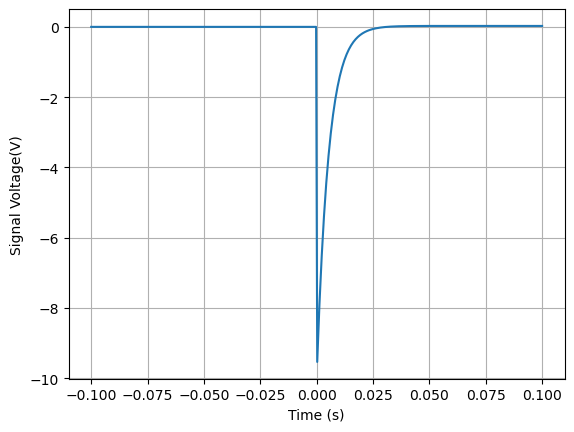

In [20]:
tv = np.linspace(-.1, .1, 400)
ht=Q(t, causal=True)
ht.plot(tv,ylabel='Signal Voltage(V)')